<a href="https://colab.research.google.com/github/Pranami-54/Admission_data_using_linear_regression/blob/main/Fake_News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

About the Dataset:

(1) id: unique id for a news article
(2) title: the title of a news article
(3) author: author of the news article
(4) text: the text of the article; could be incomplete
(5) label: a label that marks the article as potentially unreliable
  1: unreliable
  0: reliable

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Import the libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
import re
import string

In [ ]:
data_fake = pd.read_csv('/content/drive/MyDrive/Fake.csv')
data_true = pd.read_csv('/content/drive/MyDrive/True.csv')

In [ ]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
data_fake.shape

(23481, 4)

In [ ]:
data_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [ ]:
data_fake.isnull().sum()

,0
title,0
text,0
subject,0
date,0


In [ ]:
data_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
data_true.shape

(21417, 4)

In [ ]:
data_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [ ]:
data_true.isnull().sum()

,0
title,0
text,0
subject,0
date,0


In [ ]:

data_fake['class'] = 0
data_true['class'] = 1

In [ ]:
data = pd.concat([data_fake, data_true], ignore_index=True)

In [ ]:
data = data.sample(frac=1, random_state=45).reset_index(drop=True)

In [ ]:
data.head()

,title,text,subject,date,class
0,Online bettors see Donald Trump as odds-on Rep...,NEW YORK/LONDON (Reuters) - Donald Trump’s cha...,politicsNews,"February 24, 2016",1
1,WATCH: Violent Trump Fan Shoves Peaceful Prot...,The violence and hate we witnessed at Trump ra...,News,"November 14, 2016",0
2,ILLEGAL ALIENS Jump Over Border Fence as MSNBC...,Oh the irony! Left-leaning MSNBC aired a segme...,Government News,"Oct 23, 2017",0
3,Lockheed says didn't seek help from Trump's ex...,(Reuters) - Lockheed Martin Corp (LMT.N) did n...,politicsNews,"February 3, 2017",1
4,"Thanks, Obama: A Tribute To My Great President","Thank you, President Obama.In 2004, during the...",News,"January 11, 2017",0


In [ ]:
data.shape

(44898, 5)

In [ ]:
#Different subjects and their value
data['subject'].value_counts()

,count
subject,
politicsNews,11272
worldnews,10145
News,9050
politics,6841
left-news,4459
Government News,1570
US_News,783
Middle-east,778


Text(0.5, 1.0, 'Count of Subjecs')

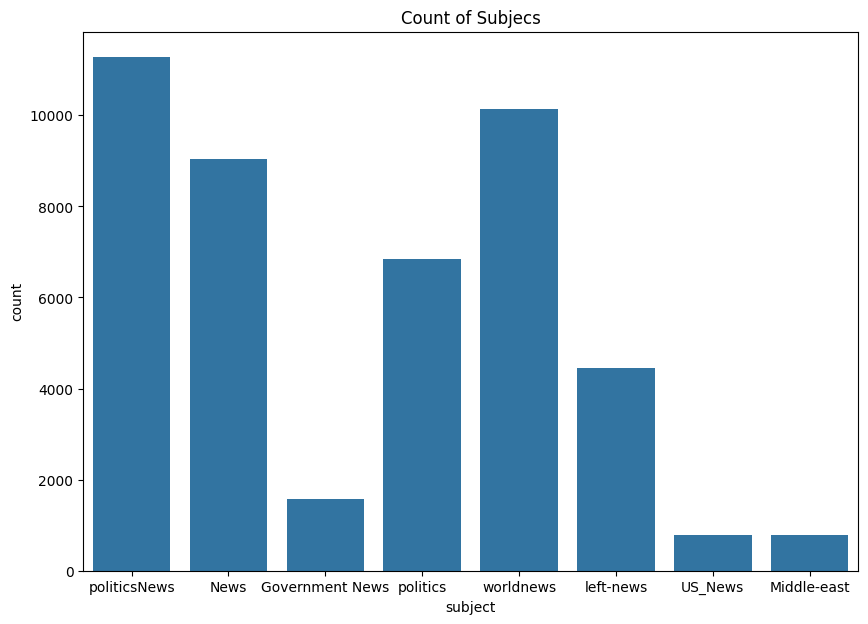

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(data=data, x='subject')
plt.title("Count of Subjecs")

In [ ]:
blanks=[]

for index,text in data['text'].items():
    if text.isspace():
        blanks.append(index)
len(blanks)

631

In [ ]:
data.drop(blanks, inplace=True)

In [ ]:
data['text']=data['title']+data['text']

In [ ]:
df=data[['text','class']]
df

,text,class
0,Online bettors see Donald Trump as odds-on Rep...,1
1,WATCH: Violent Trump Fan Shoves Peaceful Prot...,0
2,ILLEGAL ALIENS Jump Over Border Fence as MSNBC...,0
3,Lockheed says didn't seek help from Trump's ex...,1
4,"Thanks, Obama: A Tribute To My Great Presiden...",0
...,...,...
44893,"For Donald Trump, going on about golf is par f...",1
44894,BREAKING: LOYAL TRUMP SUPPORTER Offered Attorn...,0
44895,REAL-TIME DEBATE Graph Shows Trump CRUSHED Hil...,0
44896,Muhammad Ali Sent Trump A Powerful Message Th...,0


In [ ]:
df.shape

(44267, 2)

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import spacy
import re
import string

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
lemma=WordNetLemmatizer()

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
Stopwords = set(stopwords.words('english'))

In [ ]:
def preprocess_text(text):
    string = ""

    text=text.lower()

    text=re.sub(r"i'm","i am",text)
    text=re.sub(r"he's","he is",text)
    text=re.sub(r"she's","she is",text)
    text=re.sub(r"that's","that is",text)
    text=re.sub(r"what's","what is",text)
    text=re.sub(r"where's","where is",text)
    text=re.sub(r"\'ll"," will",text)
    text=re.sub(r"\'ve"," have",text)
    text=re.sub(r"\'re"," are",text)
    text=re.sub(r"\'d"," would",text)
    text=re.sub(r"won't","will not",text)
    text=re.sub(r"can't","cannot",text)

    text=re.sub(r"[-()\"#!@$%^&*{}?.,:]"," ",text)
    text=re.sub(r"\s+"," ",text)
    text=re.sub('[^A-Za-z0-9]+',' ', text)

    for word in text.split():
        if word not in Stopwords:
            string+=lemma.lemmatize(word)+" "

    return string

In [ ]:
df['processed_text'] = df['text'].apply(preprocess_text)

<ipython-input-32-e197eb3e3304>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_text'] = df['text'].apply(preprocess_text)


In [ ]:
df['processed_text'].head()

0    online bettor see donald trump odds republican...
1    watch violent trump fan shove peaceful protest...
2    illegal alien jump border fence msnbc report b...
3    lockheed say seek help trump ex campaign manag...
4    thanks obama tribute great presidentthank pres...
Name: processed_text, dtype: object

In [ ]:
#Feature extraction & model building
X=df["processed_text"]
y=df["class"]

In [ ]:
X[0]

'online bettor see donald trump odds republican nomineenew york london reuters donald trump chance winning republican nomination white house shot record high online betting site around world wednesday latest victory voting nevada betting venue britain ireland new zealand show online wagering community coalescing around trump considered rank outsider attracting long shot odds 200 1 following double digit margin win nevada republican caucus tuesday third victory first four early nominating contest odds tightened way 1 2 case mr trump triumphed yet despite political analyst almost unanimously writing serious presidential contender said graham sharpe william hill adding one customer stood collect least 100 000 trump elected white house nov 8 william hill betway make trump 1 2 favorite get republican nod ladbrokes cut odds 4 9 shown ireland paddypower nearest rival u senator marco rubio florida featured odds 6 1 ladbrokes u senator ted cruz texas battling rubio 2 spot early voting state sun

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vector = CountVectorizer(max_features=2000)
X = vector.fit_transform(df['processed_text']).toarray()

In [ ]:
X[0]

array([1, 0, 1, ..., 0, 0, 0])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=50)

In [ ]:
from sklearn.svm import SVC

model = SVC(kernel = 'linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.992922219712371

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[6775,   37],
       [  57, 6412]])

In [ ]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6812
           1       0.99      0.99      0.99      6469

    accuracy                           0.99     13281
   macro avg       0.99      0.99      0.99     13281
weighted avg       0.99      0.99      0.99     13281



In [ ]:
df['text'][1]

' WATCH: Violent Trump Fan Shoves Peaceful Protester Down Stairs From Behind Like A CowardThe violence and hate we witnessed at Trump rallies is now spilling over into the rest of society. Since the billionaire racist misogynist internet troll was elected to lead the free world, there have been literally hundreds of hate crimes (many of which in his name) and his supporters have proved completely unwilling to behave themselves even in their victory.At an anti-Trump protest in Ohio on Monday, we received a reminder of the violent nature of the animals known as Trump voters. As Tim Joseph was delivering his message into a bullhorn at the Ohio Union at OSU in Columbus, one Trump voter voiced his displeasure with the current direction of the country (or whatever bullsh*t the media is saying to explain away these alleged people s behavior today) by shoving the protester down some stairs   from behind like a coward, of course. You idiot,  the disenfranchised white man screeched as he went al

In [ ]:
import pickle

In [ ]:
filename = 'trained_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
#Loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [ ]:
filename = 'vectorizer.sav'
pickle.dump(vector, open(filename, 'wb'))

In [ ]:
preprocess = pickle.load(open('vectorizer.sav', 'rb'))

In [ ]:
def predict_news(text):
    # Preprocess the input text
    pro_text = preprocess_text(text)
    # Transform the text using the vectorizer
    text_vectorized = preprocess.transform([pro_text])
    # Convert sparse matrix to dense array
    text_vectorized = text_vectorized.toarray()
    # Make a prediction using the trained model
    prediction = loaded_model.predict(text_vectorized)
    # Return the prediction result
    if prediction[0] == 0:
        return "Fake News"
    else:
        return "Real News"

In [ ]:
input_data = 'Robert Fantina CounterpunchAlthough the United States is still ten months from its next exercise in electoral futility, most polls do not indicate what former Secretary of State Hillary Clinton is most anxious to see: a runaway victory for her candidacy. It is a good sign that, despite the fact that she has no real contrasting opponent on the Democratic side, the coronation she expected isn t going to happen.One might say that this writer focuses too much on Mrs. Clinton s adoration of Israel. But by looking at her comments about that apartheid nation, one gets a clear view of some broader, very troubling perspectives that Mrs. Clinton seems to hold.On January 6, an opinion piece appeared in The Jewish Journal, written by Mrs. Clinton. It is a fawning, maudlin essay, typical of the writing of anyone seeking national political office in the U.S. who knows they must pay homage to their Israeli lord and master. A few points from this essay tell much about Mrs. Clinton. I m especially concerned about the new wave of violence inside Israel itself   brutal stabbings, shootings, and vehicle attacks that seek to sow fear among the innocent. The number of Palestinians killed in the West Bank alone by settler and IOF (Israel Occupation Force) terrorists is at a ten-year high. Why is Mrs. Clinton not  especially concerned  about the continuing wave of violence against Palestinians, in an area that even the U.S. says Israel occupies illegally? Do not these vicious attacks  seek to sow fear among the innocent ? Only a two-state solution negotiated between the parties can provide Palestinians independence, sovereignty, and dignity, and provide Israelis the secure and recognized borders of a democratic Jewish state. Why, oh why, does Mrs. Clinton continue to make this ridiculous statement? The borders of the Jewish state are recognized by most of the world, including the United Nations, and consist of those determined prior to 1967. There is nothing to negotiate. Does Mrs. Clinton disdain international law? It appears that she feels Israel, like the U.S. in its international dealings, is, indeed, above the law. BIBI FIRST: Hillary Clinton will never tell Israel  no .And this writer must point out, once again, that negotiations, which have proceeded on and off for twenty years or so, can only be effective when each side wants something the other has, that it can only obtain by surrendering something it has. Israel wants all of Palestine, and takes it, piece by piece, with complete impunity. Why should Palestine agree to pointless negotiations?Mrs. Clinton refers to the  secure and recognized  borders of a Jewish state, but does not seem to consider the  secure and recognized  borders of a Palestinian state. We must continue to fight against global efforts to delegitimize Israel. The Boycott, Divestment, and Sanctions movement, known as BDS, is the latest front in this battle. BDS demonizes Israeli scientists and intellectuals even young students and compares Israel to South African apartheid.  That s wrong and this campaign should end. The most significant efforts to delegitimize Israel are made by Israel itself. Its racist society, wherein Israeli Jews have more rights than anyone else in Israel; its apartheid system of segregation; its complete disdain for the human rights of the Palestinians; the racist, murderous statements made by government officials all further delegitimize the country, and demonize it, and rightly so. Israel is often compared to South African apartheid, and the comparison is valid.And it is not just in the context of Palestine and Israel that Mrs. Clinton demonstrates either gross ignorance, or gross dishonesty. Her essay also contained these pearls of wisdom: We must work with our friends and partners to deny ISIS territory in the Middle East, dismantle the global infrastructure of terror, and toughen our defenses at home.  We can t just contain ISIS   we must defeat ISIS. Is that really the U.S. s goal? Garikai Chengu, a researcher at Harvard University, suggested in September of 2014 that ISIS  is made-in-the-USA, an instrument of terror designed to divide and conquer the oil-rich Middle East and to counter Iran s growing influence in the region. In a June, 2015 column in The Guardian, Associate Editor Seumas Milne said this:  [T]he U.S. and its allies weren t only supporting and arming an opposition they knew to be dominated by extreme sectarian groups; they were prepared to countenance the creation of some sort of  Islamic state    despite the  grave danger  to Iraq s unity   as a Sunni buffer to weaken Syria. Continue this article at Counterpunch READ MORE 2016 ELECTION NEWS AT: 21st Century Wire 2016 Files'
result= predict_news(input_data)
result

'Fake News'